In [ ]:
import numpy as np
import pandas as pd
#loading the dataset
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')


In [ ]:
#printing the first five rows of the dataset by using head function
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
data.columns


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
newdata = data.copy()

In [ ]:
#To identify the unique values of each attribute
features = newdata.columns
for feature in features:
  print(f'{feature}->{newdata[feature].nunique()}')

customer_id->10000
credit_score->460
country->3
gender->2
age->70
tenure->11
balance->6382
products_number->4
credit_card->2
active_member->2
estimated_salary->9999
churn->2


In [ ]:
newdata.isnull().sum()/newdata.shape[0]

customer_id         0.0
credit_score        0.0
country             0.0
gender              0.0
age                 0.0
tenure              0.0
balance             0.0
products_number     0.0
credit_card         0.0
active_member       0.0
estimated_salary    0.0
churn               0.0
dtype: float64

In [ ]:
#function for droping null values from data
def cleaning_dataset_drop(data):
  assert isinstance(data,pd.DataFrame)
  data.dropna(inplace = True)
  indices_to_keep = ~data.isin([np.nan,np.inf,-np.inf]).any(1)
  return data[indices_to_keep].astype(np.float64)

In [ ]:
#function for filling null values of data
def cleaning_dataset_fill(data):
    assert isinstance(data, pd.DataFrame)
    # Fill numeric columns with their mean
    num_cols = data.select_dtypes(include=['int64', 'float64']).columns
    data[num_cols] = data[num_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

    # For categorical columns, you can decide to fill with the mode value
    cat_cols = data.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

    # After filling NaN values, check for infinite values and handle them as well
    indices_to_keep = ~data.isin([np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [ ]:
#For time-series data it is helpful to handle missing data
newdata = newdata.interpolate()

In [ ]:
#after interpolation also,if we found any infinity values then that will drop from the data
newdata = newdata.dropna()
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#printing the unique  categorical attribute
def unique_object_names(data):
  for attribute in data:
    if data[attribute].dtype == 'object':
      print(f'{attribute}->{data[attribute].unique()}')

In [ ]:
unique_object_names(newdata)

country->['France' 'Spain' 'Germany']
gender->['Female' 'Male']


In [ ]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Filtering the dataset for customers who have not churned
# 'churn' == 0 indicates the customers who stayed with the service
Customer_Stayed = data[data['churn'] == 0]['age']

# Filtering the dataset for customers who have churned
# 'churn' == 1 indicates the customers who have left the service
Customer_Churned = data[data['churn'] == 1]['age']

# The two lines above create separate data series for the ages of customers who stayed and who churned
# These series can then be used to compare the age distributions between the two groups using visualizations like histograms or boxplots


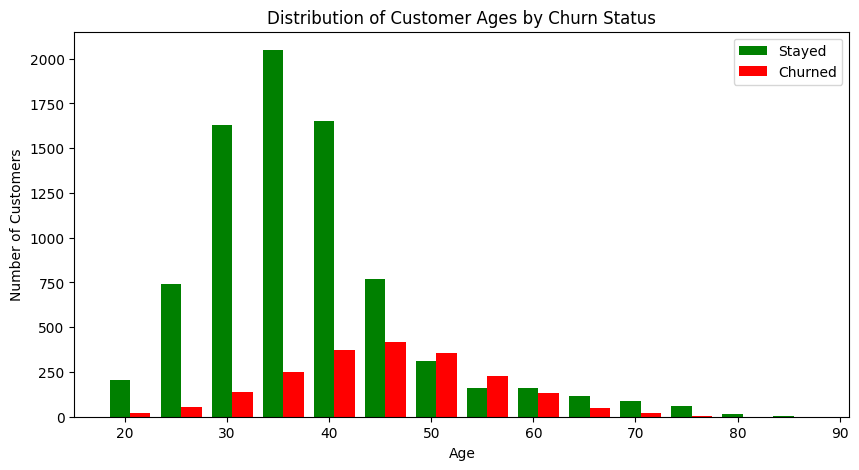

In [ ]:

plt.figure(figsize=(10, 5))
# Plot a histogram for both Customer_Stayed and Customer_Churned data with specified bins and colors
plt.hist([Customer_Stayed, Customer_Churned], bins=range(18, 90, 5), color=['green', 'red'], label=['Stayed', 'Churned'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Ages by Churn Status')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix of the data
correlation_matrix = data.corr()

# Plot a heatmap of the correlation matrix with annotations to display correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Attributes')
plt.show()

ValueError: could not convert string to float: 'France'

<Figure size 1200x800 with 0 Axes>

In [ ]:
number_columns = [['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn']]

<ipython-input-22-265938698c96>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Customer Stayed', 'Customer Churned'])


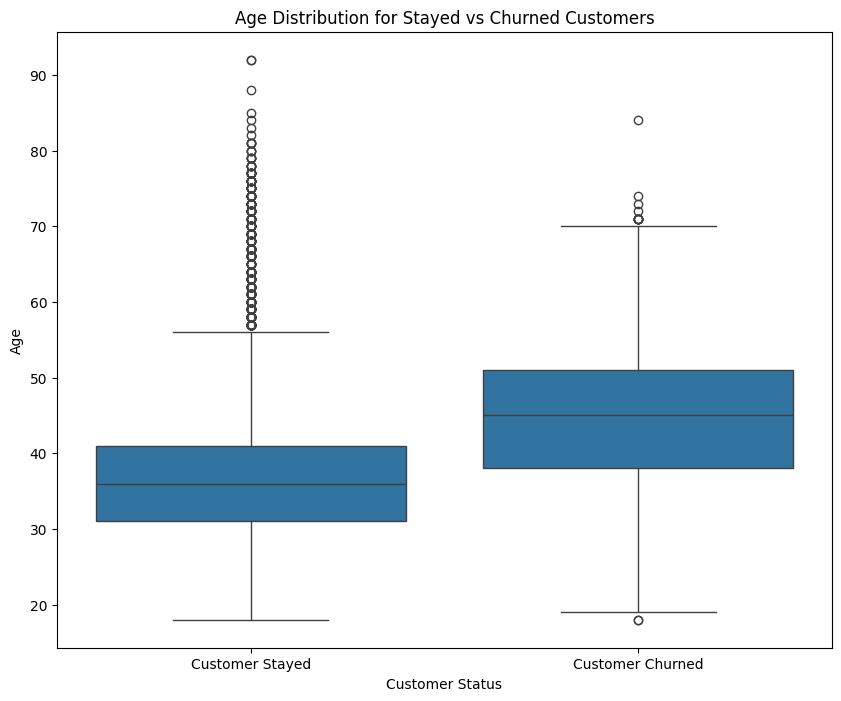

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))  # Set up the figure size as per your requirement
sns.boxplot(x='churn', y='age', data=data, ax=ax)

# Set the labels to be more informative
ax.set_xticklabels(['Customer Stayed', 'Customer Churned'])
ax.set_title('Age Distribution for Stayed vs Churned Customers')
ax.set_xlabel('Customer Status')
ax.set_ylabel('Age')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
X = data_encoded.drop('churn', axis=1)
y = data_encoded['churn']

    # Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)


Training data shape (X_train, y_train): (8000, 14) (8000,)
Testing data shape (X_test, y_test): (2000, 14) (2000,)


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply univariate feature selection (SelectKBest)
    k_best = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features based on F-test
    X_train_selected = k_best.fit_transform(X_train, y_train)
    X_test_selected = k_best.transform(X_test)

    # Initialize XGBoost model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Fit the model to the training data using the selected features
    model.fit(X_train_selected, y_train)

    # Predict on the testing data using the selected features
    y_pred = model.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1535   72]
 [ 256  137]]
Accuracy: 0.836
Precision: 0.6555023923444976
Recall: 0.3486005089058524
F1 Score: 0.4551495016611296


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply univariate feature selection (SelectKBest)
    k_best = SelectKBest(score_func=f_classif, k=4)  # Select top 5 features based on F-test
    X_train_selected = k_best.fit_transform(X_train, y_train)
    X_test_selected = k_best.transform(X_test)

    # Initialize Ridge Classifier model
    model = RidgeClassifier()

    # Fit the model to the training data using the selected features
    model.fit(X_train_selected, y_train)

    # Predict on the testing data using the selected features
    y_pred = model.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1578   29]
 [ 351   42]]
Accuracy: 0.81
Precision: 0.5915492957746479
Recall: 0.10687022900763359
F1 Score: 0.1810344827586207


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply univariate feature selection (SelectKBest)
    k_best = SelectKBest(score_func=f_classif, k=4)  # Select top 5 features based on F-test
    X_train_selected = k_best.fit_transform(X_train, y_train)
    X_test_selected = k_best.transform(X_test)

    # Initialize ExtraTreesClassifier model
    model = ExtraTreesClassifier()

    # Fit the model to the training data using the selected features
    model.fit(X_train_selected, y_train)

    # Predict on the testing data using the selected features
    y_pred = model.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1449  158]
 [ 243  150]]
Accuracy: 0.7995
Precision: 0.487012987012987
Recall: 0.3816793893129771
F1 Score: 0.42796005706134094


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply univariate feature selection (SelectKBest)
    k_best = SelectKBest(score_func=f_classif, k=4)  # Select top 5 features based on F-test
    X_train_selected = k_best.fit_transform(X_train, y_train)
    X_test_selected = k_best.transform(X_test)

    # Initialize AdaBoostClassifier model
    model = AdaBoostClassifier()

    # Fit the model to the training data using the selected features
    model.fit(X_train_selected, y_train)

    # Predict on the testing data using the selected features
    y_pred = model.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1541   66]
 [ 256  137]]
Accuracy: 0.839
Precision: 0.6748768472906403
Recall: 0.3486005089058524
F1 Score: 0.4597315436241611


Confusion Matrix:
[[1541   66]
 [ 256  137]]
Accuracy: 0.839
Precision: 0.6748768472906403
Recall: 0.3486005089058524
F1 Score: 0.4597315436241611


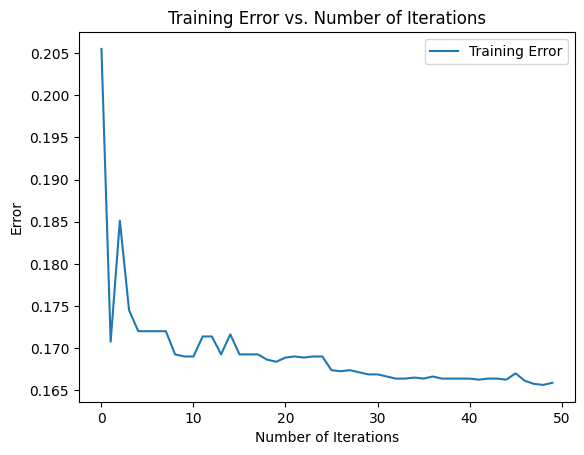

In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply univariate feature selection (SelectKBest)
    k_best = SelectKBest(score_func=f_classif, k=4)  # Select top 5 features based on F-test
    X_train_selected = k_best.fit_transform(X_train, y_train)
    X_test_selected = k_best.transform(X_test)

    # Initialize AdaBoostClassifier model
    model = AdaBoostClassifier()

    # Fit the model to the training data using the selected features
    model.fit(X_train_selected, y_train)

    # Predict on the testing data using the selected features
    y_pred = model.predict(X_test_selected)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot training error graph
    train_errors = []
    for pred in model.staged_predict(X_train_selected):
        train_errors.append(1.0 - accuracy_score(y_train, pred))
    plt.plot(train_errors, label='Training Error')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    plt.title('Training Error vs. Number of Iterations')
    plt.legend()
    plt.show()

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1541   66]
 [ 256  137]]
Accuracy: 0.839
Precision: 0.6748768472906403
Recall: 0.3486005089058524
F1 Score: 0.4597315436241611


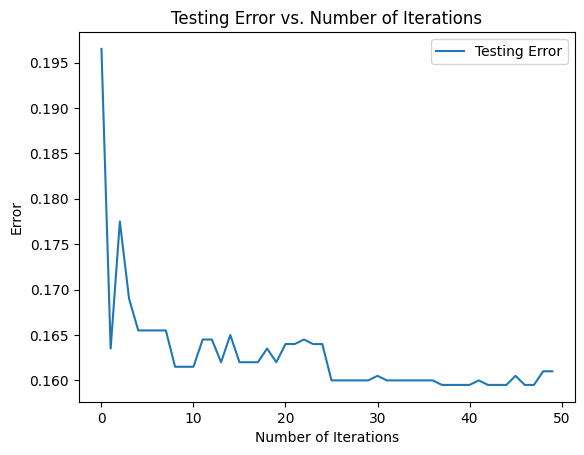

In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply univariate feature selection (SelectKBest)
    k_best = SelectKBest(score_func=f_classif, k=4)  # Select top 5 features based on F-test
    X_train_selected = k_best.fit_transform(X_train, y_train)
    X_test_selected = k_best.transform(X_test)

    # Initialize AdaBoostClassifier model
    model = AdaBoostClassifier()

    # Fit the model to the training data using the selected features
    model.fit(X_train_selected, y_train)

    # Evaluate the model
    test_errors = []
    for pred in model.staged_predict(X_test_selected):
        test_errors.append(1.0 - accuracy_score(y_test, pred))

    # Confusion matrix for the final prediction
    y_pred = model.predict(X_test_selected)
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # Plot testing error graph
    plt.plot(test_errors, label='Testing Error')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    plt.title('Testing Error vs. Number of Iterations')
    plt.legend()
    plt.show()

except Exception as e:
    traceback.print_exc()


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=5)  # Select 4 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize Ridge Classifier model
    model = RidgeClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1607    0]
 [ 393    0]]
Accuracy: 0.8035
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=4)  # Select 4 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize XGBoost model
    model = xgb.XGBClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1516   91]
 [ 247  146]]
Accuracy: 0.831
Precision: 0.6160337552742616
Recall: 0.37150127226463103
F1 Score: 0.4634920634920635


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=7)  # Select 4 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize ExtraTreesClassifier model
    model = ExtraTreesClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1549   58]
 [ 236  157]]
Accuracy: 0.853
Precision: 0.7302325581395349
Recall: 0.3994910941475827
F1 Score: 0.5164473684210525


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=4)  # Select 4 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize AdaBoostClassifier model
    model = AdaBoostClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1551   56]
 [ 311   82]]
Accuracy: 0.8165
Precision: 0.5942028985507246
Recall: 0.20865139949109415
F1 Score: 0.3088512241054614


In [ ]:
import traceback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=7)  # Select 4 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize KNN classifier
    knn = KNeighborsClassifier()

    # Initialize BaggingClassifier with KNN as the base estimator
    model = BaggingClassifier(base_estimator=knn)

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

except Exception as e:
    traceback.print_exc()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Confusion Matrix:
[[1500  107]
 [ 272  121]]
Accuracy: 0.8105
Precision: 0.5307017543859649
Recall: 0.30788804071246817
F1 Score: 0.38969404186795487


Confusion Matrix:
[[1550   57]
 [ 233  160]]
Accuracy: 0.855
Precision: 0.7373271889400922
Recall: 0.4071246819338422
F1 Score: 0.5245901639344261


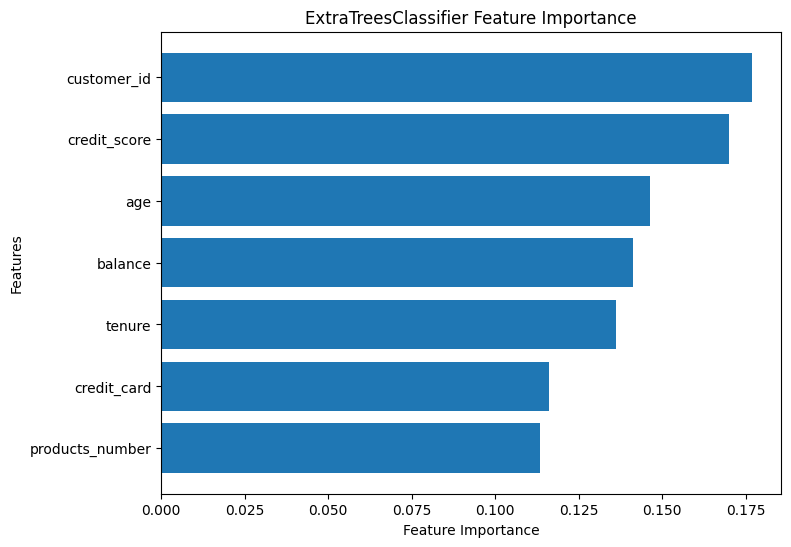

In [ ]:
import traceback
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=7)  # Select 7 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize ExtraTreesClassifier model
    model = ExtraTreesClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot feature importance graph
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1]
    features = X.columns[sorted_idx]
    importance = feature_importance[sorted_idx]

    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    plt.barh(np.arange(1, len(features) + 1), importance, align='center')  # Start ticks from 1
    plt.yticks(np.arange(1, len(features) + 1), features)  # Start labels from 1
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('ExtraTreesClassifier Feature Importance')
    plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
    plt.show()

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1551   56]
 [ 241  152]]
Accuracy: 0.8515
Precision: 0.7307692307692307
Recall: 0.38676844783715014
F1 Score: 0.5058236272878536


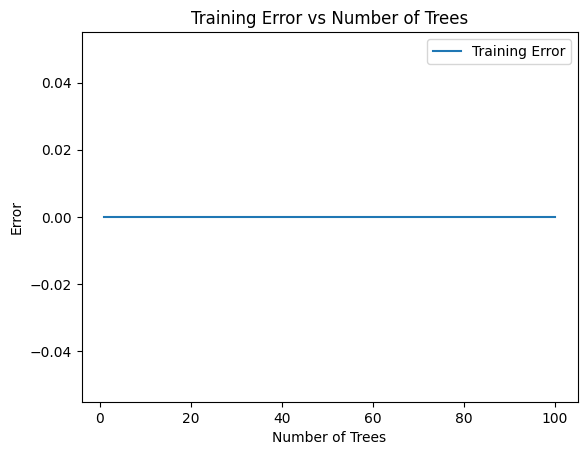

In [ ]:
import traceback
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=7)  # Select 7 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize ExtraTreesClassifier model
    model = ExtraTreesClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot training error graph
    n_estimators = len(model.estimators_)
    train_errors = []
    for i in range(n_estimators):
        y_pred_train = model.estimators_[i].predict(X_train_pca)
        train_errors.append(1 - accuracy_score(y_train, y_pred_train))

    plt.plot(np.arange(1, n_estimators + 1), train_errors, label='Training Error')
    plt.xlabel('Number of Trees')
    plt.ylabel('Error')
    plt.title('Training Error vs Number of Trees')
    plt.legend()
    plt.show()

except Exception as e:
    traceback.print_exc()


Confusion Matrix:
[[1559   48]
 [ 255  138]]
Accuracy: 0.8485
Precision: 0.7419354838709677
Recall: 0.3511450381679389
F1 Score: 0.47668393782383417


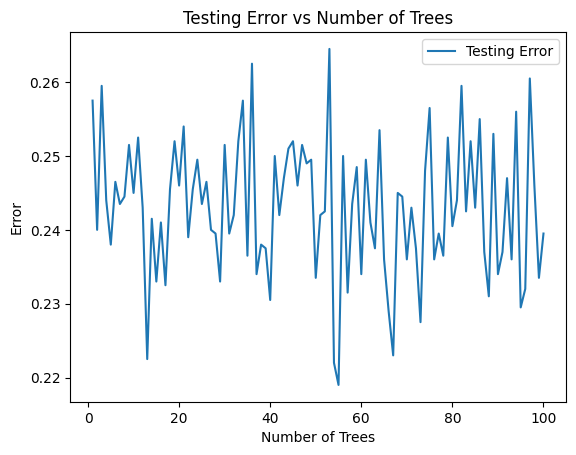

In [ ]:
import traceback
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=8)  # Select 7 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize ExtraTreesClassifier model
    model = ExtraTreesClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict on the testing data using the PCA-transformed features
    y_pred = model.predict(X_test_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot testing error graph
    n_estimators = len(model.estimators_)
    test_errors = []
    for i in range(n_estimators):
        y_pred_test = model.estimators_[i].predict(X_test_pca)
        test_errors.append(1 - accuracy_score(y_test, y_pred_test))

    plt.plot(np.arange(1, n_estimators + 1), test_errors, label='Testing Error')
    plt.xlabel('Number of Trees')
    plt.ylabel('Error')
    plt.title('Testing Error vs Number of Trees')
    plt.legend()
    plt.show()

except Exception as e:
    traceback.print_exc()


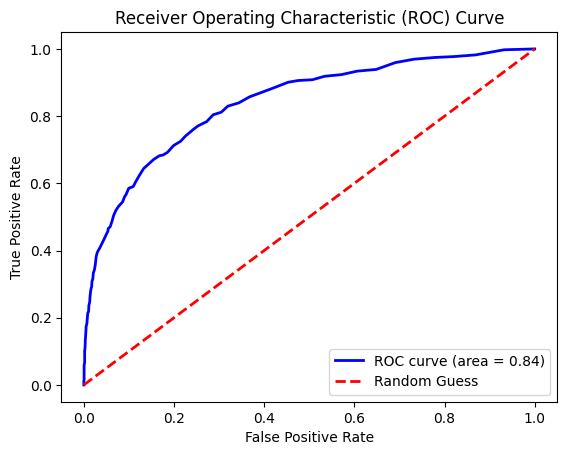

In [ ]:
import traceback
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

try:
    # Assuming 'data' is your DataFrame and it includes the 'churn' column
    # One-hot encode categorical variables
    data_encoded = pd.get_dummies(data, columns=['country', 'gender'])

    # Separate features and target
    X = data_encoded.drop('churn', axis=1)
    y = data_encoded['churn']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=7)  # Select 7 principal components
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Initialize ExtraTreesClassifier model
    model = ExtraTreesClassifier()

    # Fit the model to the training data using the PCA-transformed features
    model.fit(X_train_pca, y_train)

    # Predict probabilities on the testing data using the PCA-transformed features
    y_proba = model.predict_proba(X_test_pca)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

except Exception as e:
    traceback.print_exc()
